<a href="https://colab.research.google.com/github/comandi1969/AIFFEL_Online_Quest/blob/main/DL_Master/%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%8B%9C%EC%9E%91CV05_CNN%EA%B5%AC%EC%A1%B0%EA%B5%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [ ]:
# 가로 28, 세로 28, 채널 수 1의 input 데이터를 받는 input layer 생성하기
input_layer = tf.keras.layers.Input(shape=(28, 28, 1))

# 커널의 가로 세로 사이즈는 3이고, 채널 수는 4, zero-padding을 넣고,
# stride는 1로 한 Conv2D layer
x = tf.keras.layers.Conv2D(filters=4, kernel_size=3, strides=1, padding='same', activation='relu')(input_layer)

print(type(x))
print(x)

<class 'keras.engine.keras_tensor.KerasTensor'>
KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 4), dtype=tf.float32, name=None), name='conv2d/Relu:0', description="created by layer 'conv2d'")


In [ ]:
print(input_layer.shape)
print(x.shape)

(None, 28, 28, 1)
(None, 28, 28, 4)


In [ ]:
# Q. 가로 27, 세로 27, 채널 수 1의 input 데이터를 받는 input layer 생성해 보세요.
input_layer1 = tf.keras.layers.Input(shape=(27, 27, 1))

In [ ]:
# Q. 커널의 가로 세로 사이즈는 2이고, 채널 수는 6, zero-padding을 넣고,
# stride는 2인 Conv2D layer x1을 생성해 보세요. (활성화 함수 : relu)
x1 = tf.keras.layers.Conv2D(filters=6, kernel_size=2, strides=2, padding='same', activation='relu')(input_layer1)
print(type(x1))
print(x1)

<class 'keras.engine.keras_tensor.KerasTensor'>
KerasTensor(type_spec=TensorSpec(shape=(None, 14, 14, 6), dtype=tf.float32, name=None), name='conv2d_1/Relu:0', description="created by layer 'conv2d_1'")


In [ ]:
# 가로 세로 사이즈가 2인 영역에서 최대값을 뽑는 Maxpooling을 적용
x2 = tf.keras.layers.MaxPooling2D(2)(x1)
print(x1)
print(x2)

KerasTensor(type_spec=TensorSpec(shape=(None, 14, 14, 6), dtype=tf.float32, name=None), name='conv2d_1/Relu:0', description="created by layer 'conv2d_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 6), dtype=tf.float32, name=None), name='max_pooling2d/MaxPool:0', description="created by layer 'max_pooling2d'")


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7, 7, 5)]         0         
                                                                 
 conv2d (Conv2D)             (None, 7, 7, 4)           184       
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 8)           296       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 2, 2, 8)          0         
 )                                                               
                                                                 
Total params: 480
Trainable params: 480
Non-trainable params: 0
_________________________________________________________________


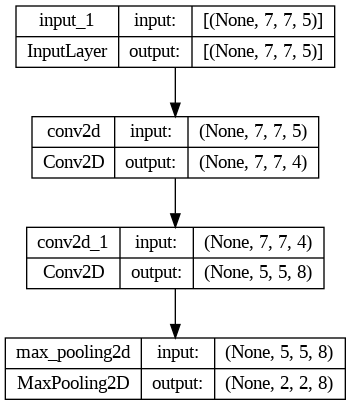

In [2]:
input_layer = tf.keras.layers.Input(shape=(7, 7, 5))
convlayer1 = tf.keras.layers.Conv2D(filters=4, kernel_size=3, strides=1, padding='same')(input_layer)
convlayer2 = tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=1, padding='valid')(convlayer1)
pooling = tf.keras.layers.MaxPooling2D(2)(convlayer2)

model = tf.keras.Model(inputs=input_layer, outputs=pooling)
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True)

In [3]:
input_layer = tf.keras.layers.Input(shape=(13, 13, 5))
convlayer1 = tf.keras.layers.Conv2D(filters=8, kernel_size=5, strides=2, padding='valid')(input_layer)
convlayer2 = tf.keras.layers.Conv2D(filters=16, kernel_size=5, strides=2, padding='valid')(convlayer1)
pooling = tf.keras.layers.MaxPooling2D(2)(convlayer2)

model = tf.keras.Model(inputs=input_layer, outputs=pooling)
model.summary()
# input_layer 크기: (13, 13, 5)
# convlayer1 크기: (5, 5, 8)
# convlayer2 크기: (1, 1, 16) => 1 x 1 사이즈는 MaxPooling2D(2) 불가해 오류가 발생하는 것으로 판단합니다.

ValueError: ignored

In [4]:
input_tensor = tf.keras.layers.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

# 3차원으로 되어있는 Feature map 결과를 Fully Connected 연결하기 위해서는 Flatten()을 적용해야 합니다.
x = tf.keras.layers.Flatten()(x)

# Flatten 된 결과를 100의 노드를 가진 Fuly Connected Layer와 연결
x = tf.keras.layers.Dense(100, activation='relu')(x)
output = tf.keras.layers.Dense(10, activation='softmax')(x)

In [5]:
# Q. tf.keras.Model을 사용하여 model을 정의해 주세요. (위에 코드 참고해서 작성해 보세요.)
model = tf.keras.Model(inputs=input_tensor, outputs=output)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 100)               1081700   
                                                           

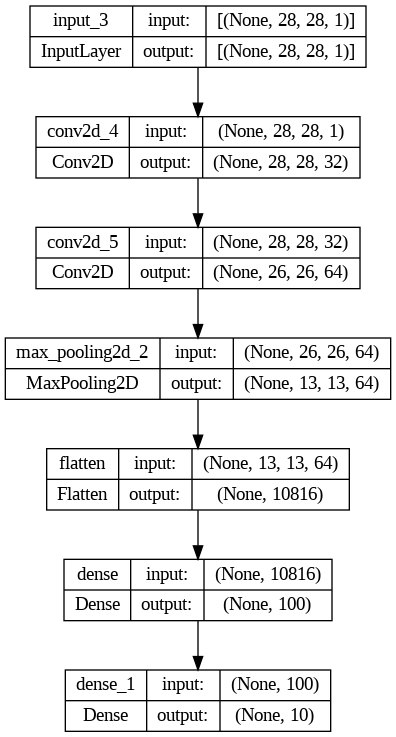

In [7]:
# Q. 정의해 준 model이 잘 만들어졌는지 summary를 통해 확인해 보세요.
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True)

# 입력 레이어:  출력(None, 28, 28, 1), 파라미터 수 0
# 첫 번째 합성곱층: 출력(None, 28, 28, 32), 파라미터 수: (커널 너비×커널 높이×입력 채널 수+편향)×필터 수 = (3×3×1+1)×32 = 320
# 두 번째 합성곱층: 출력(None, 26, 26, 64), 파라미터 수: (커널 너비×커널 높이×입력 채널 수+편향)×필터 수 = (3×3×32+1)×64 = 18,496
# 맥스 풀링층: 출력 (13, 13, 64), 파라미터 수: 0
# 플래튼층:  출력(None, 10,816), 파라미터 수: 0
# 첫 번째 Dense층: 출력(None, 100), 파라미터  수: (입력 노드 수+편향)×출력 노드 수 = (10,816+1)×100 = 1,081,700
# 두 번째 Dense층: 출력(None, 10), 파라미터 수:  (입력 노드 수+편향)×출력 노드 수 = (100+1)×10 = 1,010

# 총 파라미터 수: 1,101,526
